In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

raw_match_data = pd.read_csv("../data/30-09-25/matches.csv")
participants = pd.read_csv("../data/30-09-25/participants.csv")
players = pd.read_csv("../data/30-09-25/players.csv")

<h2>Rank Distribution of dataset</h2>
For context, the rank distribution is not "natural". In order to better represent all types of players within the game, I set goals for database composition which are as follows:
<ul>
    <li>Iron : 10%</li>
    <li>Bronze : 10%</li>
    <li>Silver: 15%</li>
    <li>Gold : 15%</li>
    <li>Platinum : 10%</li>
    <li>Emerald : 10%</li>
    <li>Diamond : 10%</li>
    <li>Master : 6.6%</li>
    <li>Grandmaster : 6.6%</li>
    <li>Challenger : 6.6%</li>
</ul>

Text(0, 0.5, 'Count')

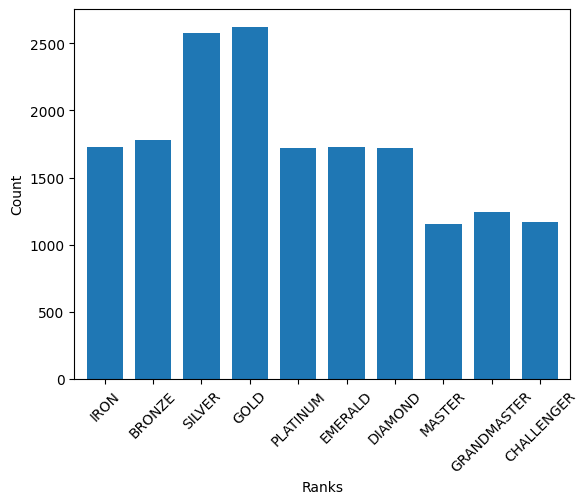

In [2]:
ranks = raw_match_data['rank']
rank_order = ["IRON", "BRONZE", "SILVER", "GOLD", "PLATINUM", "EMERALD", "DIAMOND", "MASTER", "GRANDMASTER", "CHALLENGER"]
rank_counts = ranks.value_counts()
total = rank_counts.sum()

rank_counts = rank_counts.loc[rank_order]
rank_counts.plot(kind="bar", width = 0.75)
plt.xticks(rotation=45)
plt.xlabel("Ranks")
plt.ylabel("Count")


<h1>Average Game Duration By Rank

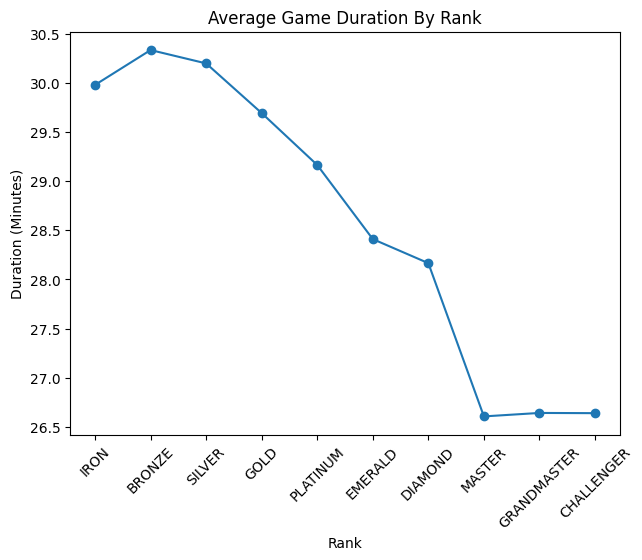

In [3]:
iron_games = raw_match_data[raw_match_data['rank'] == "IRON"]
bronze_games = raw_match_data[raw_match_data['rank'] == "BRONZE"]
silver_games = raw_match_data[raw_match_data['rank'] == "SILVER"]
gold_games = raw_match_data[raw_match_data['rank'] == "GOLD"]
platinum_games = raw_match_data[raw_match_data['rank'] == "PLATINUM"]
emerald_games = raw_match_data[raw_match_data['rank'] == "EMERALD"]
diamond_games = raw_match_data[raw_match_data['rank'] == "DIAMOND"]
master_games = raw_match_data[raw_match_data['rank'] == "MASTER"]
grandmaster_games = raw_match_data[raw_match_data['rank'] == "GRANDMASTER"]
challenger_games = raw_match_data[raw_match_data['rank'] == "CHALLENGER"]

duration_data = {
    "IRON": iron_games['game_duration'].mean() / 60,
    "BRONZE": bronze_games['game_duration'].mean() / 60,
    "SILVER": silver_games['game_duration'].mean() / 60,
    "GOLD": gold_games['game_duration'].mean() / 60,
    "PLATINUM": platinum_games['game_duration'].mean() / 60,
    "EMERALD": emerald_games['game_duration'].mean() / 60,
    "DIAMOND": diamond_games['game_duration'].mean() / 60,
    "MASTER": master_games['game_duration'].mean() / 60,
    "GRANDMASTER": grandmaster_games['game_duration'].mean() / 60,
    "CHALLENGER": challenger_games['game_duration'].mean() / 60,
}

duration_data = pd.Series(data=duration_data)
duration_data.plot(kind="line", marker="o")
plt.xlabel('Rank')
plt.ylabel('Duration (Minutes)')
plt.tight_layout()
plt.xticks(ticks=range(len(rank_order)), labels=rank_order, rotation=45)
plt.title("Average Game Duration By Rank")
plt.show()

In [4]:
merged = participants.merge(players, on="puuid", how="inner")
iron_participants = merged[merged["current_rank"] == "IRON"]
bronze_participants = merged[merged["current_rank"] == "BRONZE"]
silver_participants = merged[merged["current_rank"] == "SILVER"]
gold_participants = merged[merged["current_rank"] == "GOLD"]
platinum_participants = merged[merged["current_rank"] == "PLATINUM"]
emerald_participants = merged[merged["current_rank"] == "EMERALD"]
diamond_participants = merged[merged["current_rank"] == "DIAMOND"]
master_participants = merged[merged["current_rank"] == "MASTER"]
grandmaster_participants = merged[merged["current_rank"] == "GRANDMASTER"]
challenger_participants = merged[merged["current_rank"] == "CHALLENGER"]

<h1>Average Kills, Deaths and Assists per rank</h1>

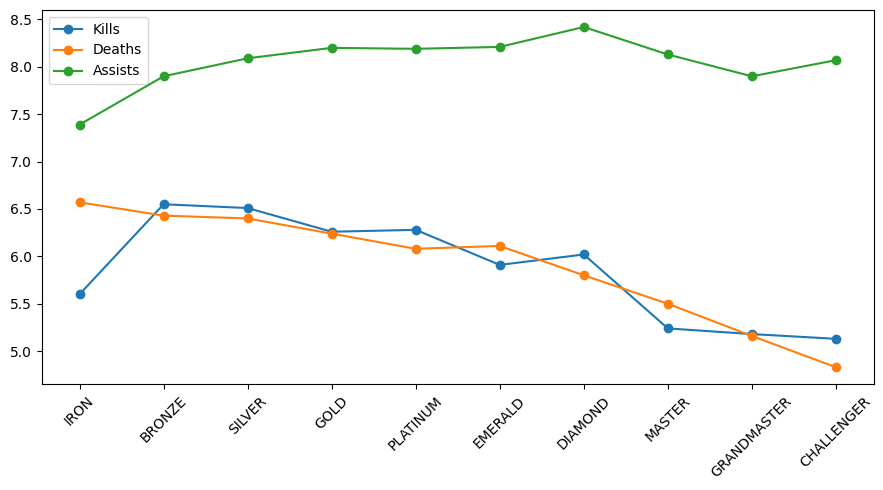

In [5]:
average_kills = pd.Series({
    "IRON": np.round(iron_participants['kills'].mean(), 2),
    "BRONZE": np.round(bronze_participants['kills'].mean(), 2),
    "SILVER": np.round(silver_participants['kills'].mean(), 2),
    "GOLD": np.round(gold_participants['kills'].mean(), 2),
    "PLATINUM": np.round(platinum_participants['kills'].mean(), 2),
    "EMERALD": np.round(emerald_participants['kills'].mean(), 2),
    "DIAMOND": np.round(diamond_participants['kills'].mean(), 2),
    "MASTER": np.round(master_participants['kills'].mean(), 2),
    "GRANDMASTER": np.round(grandmaster_participants['kills'].mean(), 2),
    "CHALLENGER": np.round(challenger_participants['kills'].mean(), 2),
})


average_deaths = pd.Series({
    "IRON": np.round(iron_participants['deaths'].mean(), 2),
    "BRONZE": np.round(bronze_participants['deaths'].mean(), 2),
    "SILVER": np.round(silver_participants['deaths'].mean(), 2),
    "GOLD": np.round(gold_participants['deaths'].mean(), 2),
    "PLATINUM": np.round(platinum_participants['deaths'].mean(), 2),
    "EMERALD": np.round(emerald_participants['deaths'].mean(), 2),
    "DIAMOND": np.round(diamond_participants['deaths'].mean(), 2),
    "MASTER": np.round(master_participants['deaths'].mean(), 2),
    "GRANDMASTER": np.round(grandmaster_participants['deaths'].mean(), 2),
    "CHALLENGER": np.round(challenger_participants['deaths'].mean(), 2),
})

average_assists = pd.Series({
    "IRON": np.round(iron_participants['assists'].mean(), 2),
    "BRONZE": np.round(bronze_participants['assists'].mean(), 2),
    "SILVER": np.round(silver_participants['assists'].mean(), 2),
    "GOLD": np.round(gold_participants['assists'].mean(), 2),
    "PLATINUM": np.round(platinum_participants['assists'].mean(), 2),
    "EMERALD": np.round(emerald_participants['assists'].mean(), 2),
    "DIAMOND": np.round(diamond_participants['assists'].mean(), 2),
    "MASTER": np.round(master_participants['assists'].mean(), 2),
    "GRANDMASTER": np.round(grandmaster_participants['assists'].mean(), 2),
    "CHALLENGER": np.round(challenger_participants['assists'].mean(), 2),
})

stat_df = pd.DataFrame({"Kills" : average_kills, "Deaths" : average_deaths, "Assists" : average_assists})
stat_df.plot(kind="line", marker="o",figsize=(9,5))
plt.xticks(ticks=range(len(rank_order)), labels=rank_order, rotation=45)
plt.tight_layout()